# Gradient Descent

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

## Sum of squares

In [2]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

In [3]:
n=10
X = np.linspace(-6, 6, num=n)
Y = np.linspace(-6, 6, num=n)
U, V = np.meshgrid(X, Y)

Here's what the sume of squares function looks like in a nifty 3D plot. It's easy to guess that its global minimum is at the origin.

In [4]:
Z = sum_of_squares((U,V))

Text(0.5,0,'z')

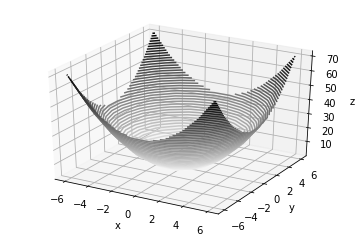

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Estimating the gradient

In [7]:
def partial_difference_quotient(f, v, i, epsilon=0.00001):
    """
    estimate partial derivative with respect to v_i of f at v
    """
    v0 = [(v_j-epsilon) if j==i else v_j for j, v_j in enumerate(v)]
    v1 = [(v_j+epsilon) if j==i else v_j for j, v_j in enumerate(v)]
    return (f(v1) - f(v0)) / (2*epsilon)

In [8]:
def estimate_gradient(f, v, epsilon=0.00001):
    return [partial_difference_quotient(f, v, i, epsilon) for i, _ in enumerate(v)]

In [13]:
estimate_gradient(sum_of_squares, (0.3, 0.3))

[0.6000000000006, 0.6000000000006]

As expected, the negative of the gradient points down hill towards the origin. The sides of the bowl get quickly steeper and thus the gradient larger as you get further away from the minimum.

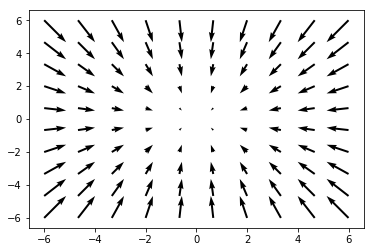

In [14]:
plt.quiver(X, Y,
           -partial_difference_quotient(sum_of_squares, (U,V), 0),
           -partial_difference_quotient(sum_of_squares, (U,V), 1))
plt.show()

## Gradient descent

Find the minimum by following the gradient.

In [22]:
def step(v, direction, step_size):
    """
    move step_size in the direction from v
    """
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

In [23]:
def distance(v, w):
    return math.sqrt(sum((vi-wi)**2 for vi, wi in zip(v,w)))

In [24]:
tolerance = 0.0000001

In [43]:
v = [random.randint(-10,10) for i in range(3)]

In [44]:
print(v)

[-7, 6, 6]


In [45]:
err = []
while True:
    err.append(sum_of_squares(v))
    gradient = estimate_gradient(sum_of_squares, v)
    next_v = step(v, gradient, -0.001)
    if distance(next_v, v) < tolerance:
        break
    v = next_v

In [46]:
v

[-3.1788808559353546e-05, 2.7247550193601045e-05, 2.72475501935636e-05]

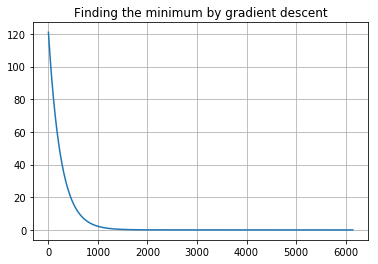

In [98]:
plt.plot(err)
plt.title('Finding the minimum by gradient descent')
plt.grid(True)
plt.show()

## Turning that into a function

In [57]:
def safe(f):
    """
    return a new function that's the same as f, except that it outputs
    infinity whenever f produces an error
    """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [92]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_0
    #target_fn = safe(target_fn)
    value = target_fn(theta)
    values = []
    
    # set theta to initial value
    # safe version of target_fn
    # value we're minimizing
    while True:
        values.append(value)
        gradient = gradient_fn(theta)
        next_thetas = [np.array(step(theta, gradient, -step_size))
                       for step_size in step_sizes]

        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            values.append(next_value)
            return theta, values
        else:
            theta, value = next_theta, next_value


In [93]:
theta, values = minimize_batch(lambda v: v**2, lambda v: 2*v, np.array([25]))

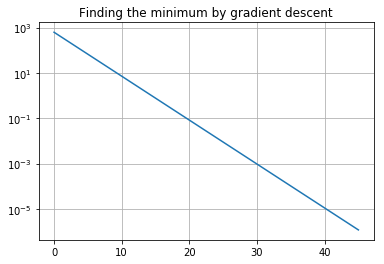

In [100]:
plt.semilogy(values)
plt.title('Finding the minimum by gradient descent')
plt.grid(True)
plt.show()